<a href="https://colab.research.google.com/github/Snafkin547/Quantum-ML/blob/main/QML_Ch11_Quantum_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip
!pip install kaggle


### Visualize Bloch Sphere with Theta for prob and Phi for phase

In [ ]:
from math import pi, sin, cos
import matplotlib.pyplot as plt
import matplotlib
from qutip import Bloch

def plot_bloch_vector_spherical(theta, phi):
  # Initialize Bloch Sphere
  b=Bloch()
  # Clear old date, if any
  b.clear()
  # Add my vector
  vec=[sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)]
  b.add_vectors(vec)
  return b.show()

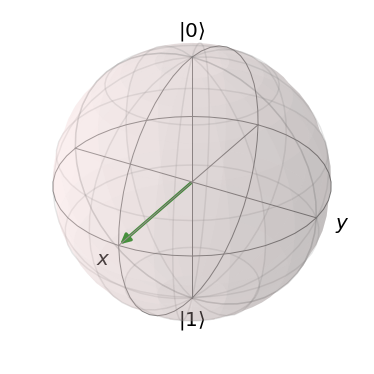

In [ ]:
plot_bloch_vector_spherical(pi/2, 0)

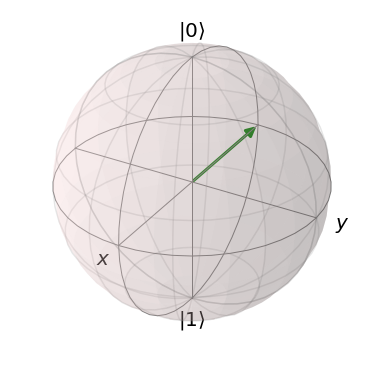

In [ ]:
plot_bloch_vector_spherical(-pi/2, 0)

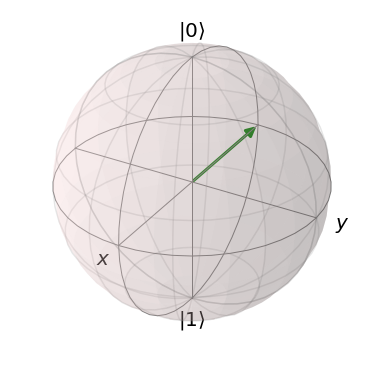

In [ ]:
plot_bloch_vector_spherical(pi/2, pi)

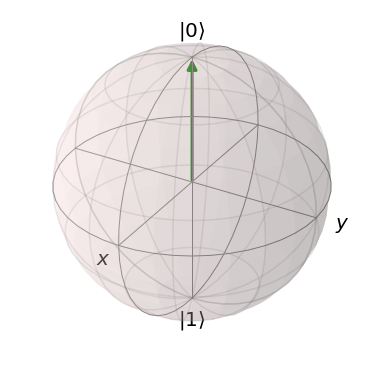

In [ ]:
plot_bloch_vector_spherical(0, pi/2)

### Visualize the invisible Qubit Phase

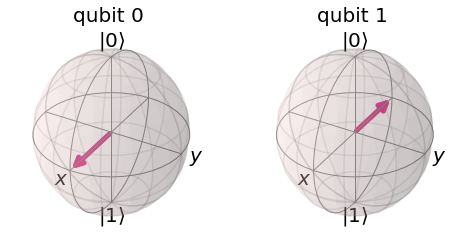

In [ ]:
#Z gate

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

qc=QuantumCircuit(2)

# Qbit 0 to |+>
qc.h(0)
# Qbit 1 to |->
qc.h(1)
qc.z(1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)



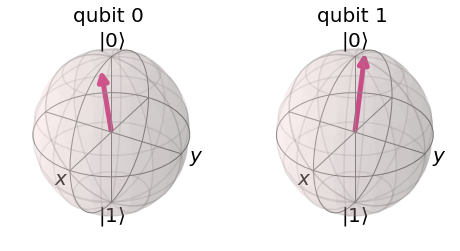

In [ ]:
# Z Rotate by theta=pi/12

qc=QuantumCircuit(2)
qc.ry(pi/12, 0)
qc.ry(pi/12, 1)
qc.z(1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)



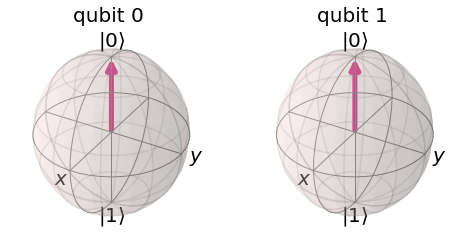

In [ ]:
# Z gate to state |0>

qc=QuantumCircuit(2)
qc.i(0)
qc.z(1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

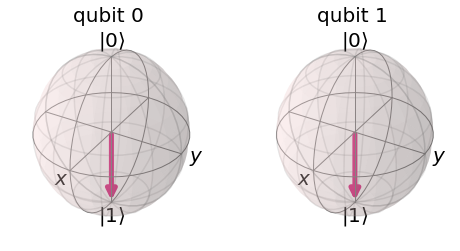

In [ ]:
# Z gate to state |1>

qc=QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.z(1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

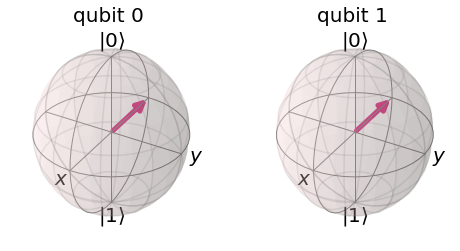

In [ ]:
# ZH gate to state |1>

qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)

qc.x(1)
qc.z(1)
qc.h(1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

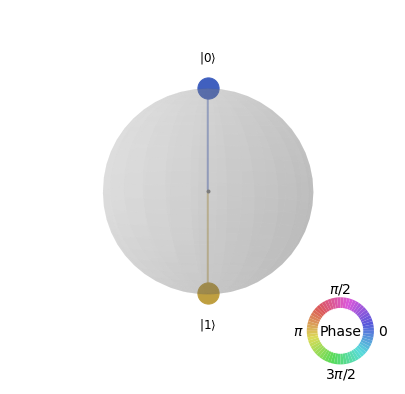

In [ ]:
from qiskit.visualization import plot_state_qsphere

qc=QuantumCircuit(1)

qc.h(0)
qc.z(0)
out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

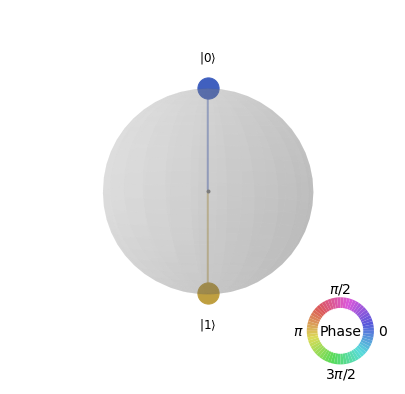

In [ ]:
# ZH on qubit state |1>

from qiskit.visualization import plot_state_qsphere

qc=QuantumCircuit(1)

qc.x(0)
qc.z(0)
qc.h(0)
out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

### Multiple Qubits

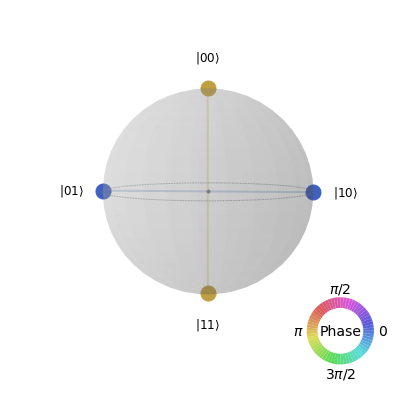

In [ ]:
qc=QuantumCircuit(2)

# qubit 0 to state (|0>-|1>)/sqrt(2)
qc.x(0)
qc.h(0)

# qubit 1 to state (-|0>+|1>)/sqrt(2)
qc.x(1)
qc.z(1)
qc.h(1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)

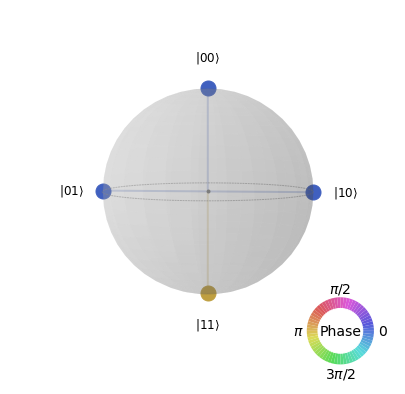

In [ ]:
qc=QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cz(0,1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_qsphere(out)


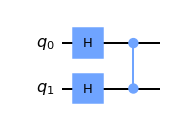

In [ ]:
qc.draw('mpl')

### Phase Kickback

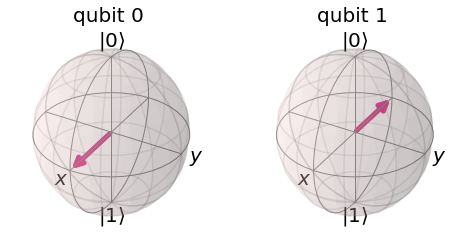

In [ ]:
##Apply Hadamard Gate twice

qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)


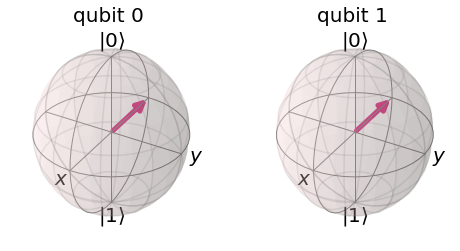

In [ ]:
##Apply Hadamard Gate twice + CNOT

qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)


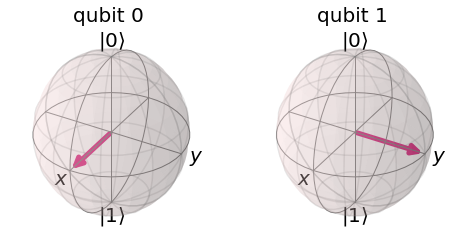

In [ ]:
##Apply Hadamard Gate in both qubits + rz gate to rotate 180 around Z-axis

qc=QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.rz(pi/2,1)

out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)


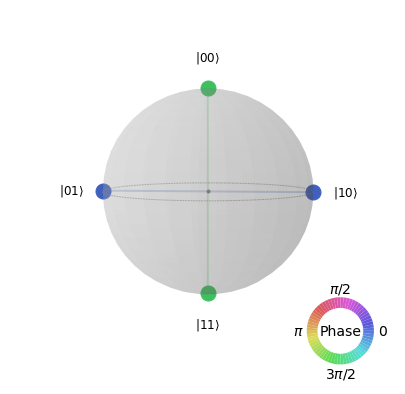

In [ ]:
'''Qubit 1 rotates 90 '''
plot_state_qsphere(out)

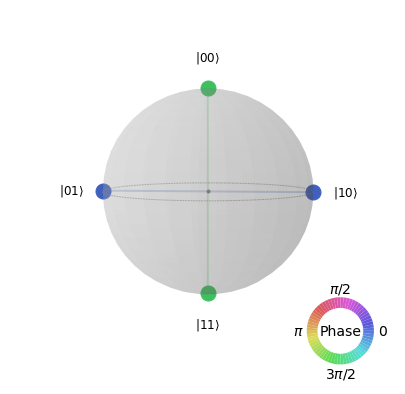

In [ ]:
##Apply Hadamard Gate in both qubits + rz gate to rotate 180 around Z-axis

qc=QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.rz(pi/2,1)
qc.cx(0,1)
out=execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
''' phase of |01> and |11> are flipped by CNOT gate'''
plot_state_qsphere(out)

### Grover's iterate

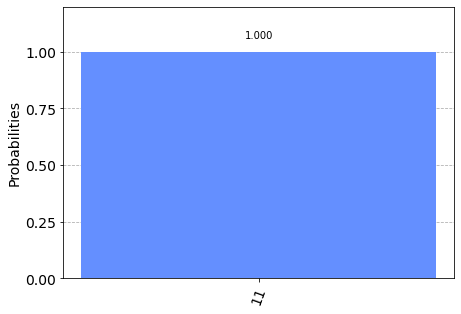

In [ ]:
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)
qc.z(0)
qc.z(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)

# execute the qc
results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(results)

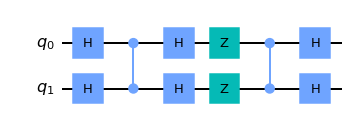

In [ ]:
qc.draw('mpl')